# Life history trade-offs: Antibiotic Resistance and Vaccination

## SIR Model without birth rate or death rate

#### followed closely after the tutorial from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/ and http://web.pdx.edu/~gjay/teaching/mth271_2020/html/09_SEIR_model.html 

for the entity of this simulation we will assume the same population size $N$ and the same starting conditions for $S_0$, $I_0$ and $R_0$. The rest of the parameters varies from case to case.

In [109]:
#imports

import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact, interactive, interact_manual, fixed
import ipywidgets as widgets
from ipywidgets import FloatSlider

The simple SIR model we employ here is formulated using the following ODEs

$$
\begin{aligned}
\frac{dS}{dt} &= - \beta S I\\
\frac{dI}{dt} &= \beta S I - \gamma I\\
\frac{dR}{dt} &= \gamma I
\end{aligned}
$$

For this model we can calculate the equilibrium solutions, so setting the time derivative to zero

$$
\begin{aligned}
\frac{dS}{dt} &= - \beta S I \stackrel{!}{=} 0\\
\frac{dI}{dt} &= \beta S I - \gamma I \stackrel{!}{=} 0\\
\frac{dR}{dt} &= \gamma I \stackrel{!}{=} 0
\end{aligned}
$$

This gives two solutions:
* disease free solution (I = 0)
$$
\begin{aligned}
S_f &= C\\
I_f &= 0\\
R_f &= C
\end{aligned}
$$

* endemic solution (not done yet)
$$
\begin{aligned}
S_e &= \frac{\gamma}{\beta}\\
I_e &= 0\\
R_e &= C
\end{aligned}
$$


The parameter values were taken from Lehtinen 2018 and Colijn 2009

In [110]:
#initialising variables

#total population size
N = 1000 

#prior immune and recovered
I0, R0 = 1, 0

#prior susceptible
S0 = N - I0 - R0

#contact rate beta and recovery rate gamma
beta, gamma = 1/N, 1./10

#interval to plot
t = 160

In [111]:
#PRE: all variables are positive integers
#POST: The SIR model

def SIR (t, y, N, beta, gamma):
    S, I, R = y
    dSdt = - beta * S * I 
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I

    return dSdt, dIdt, dRdt


### Solving the ODE system

In [112]:
#initial vector
y0 = S0, I0, R0

#numerically integrate the ODEs using Runge Kutta Method
sol = solve_ivp(SIR, [0,t], y0, method = 'RK23', dense_output = True, args=(N, beta, gamma))

### Plotting the Result

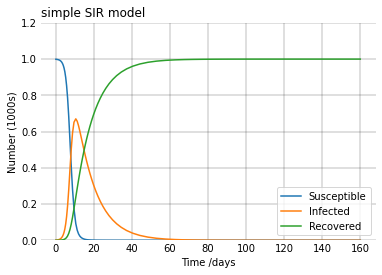

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111,  axisbelow=True)
curves = ax.plot(sol.t, sol.y.T/1000)
ax.legend(curves, ['Susceptible', 'Infected', 'Recovered'])
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('simple SIR model', loc='left')
plt.show()


## SIR model with death rates and birth rates

The SIR model using birth and death rates we employ here is formulated using the following ODEs. This model was introduced in the infectious disease dynamics script at ETH

$$
\begin{aligned}
\frac{dS}{dt} &= \Lambda - \delta_S S - \beta S I\\
\frac{dI}{dt} &= \beta S I - \delta_I I - \gamma I\\
\frac{dR}{dt} &= \gamma I - \delta_R R
\end{aligned}
$$

For this case we can calculate the equilibrium solutions so where the time derivative equals zero

$$
\begin{aligned}
\frac{dS}{dt} &= \Lambda - \delta_S S - \beta S I \stackrel{!}{=} 0\\
\frac{dI}{dt} &= \beta S I - \delta_I I - \gamma I \stackrel{!}{=} 0\\
\frac{dR}{dt} &= \gamma I - \delta_R R \stackrel{!}{=} 0
\end{aligned}
$$

This gives two solutions
* disease free solution (I = 0)
$$
\begin{aligned}
S_f &= \frac{\Lambda}{\delta_S}\\
I_f &= 0\\
R_f &= 0
\end{aligned}
$$

* endemic solution
$$
\begin{aligned}
S_e &= \frac{\delta_I + \gamma}{\beta}\\
I_e &= \frac{\Lambda}{\delta_I + \gamma} - \frac{\delta_S}{\beta}\\
R_e &= \frac{\gamma}{\delta_R}\left(\frac{\Lambda}{\delta_I+\gamma}-\frac{\delta_S}{\beta}\right)
\end{aligned}
$$

In [114]:
#adding birth and death rates to the simple SIR model

#parameters given above
beta = 1/N
gamma = 0.1

#parameters to be added
Lambda = 0.5
deltaS = 0.01
deltaI = 0.1
deltaR = 0.01

In [115]:
#PRE: all variables are positive integers
#POST: The SIR model with death rates

def SIRcomplex (t, y, N, beta, gamma, Lambda, deltaS, deltaI, deltaR):
    S, I, R = y
    dSdt = Lambda - deltaS * S - beta * S * I
    dIdt = beta * S * I  - deltaI * I - gamma * I
    dRdt = gamma * I - deltaR * R

    return dSdt, dIdt, dRdt


### Solving the ODE system

In [116]:
#numerically integrate the ODEs
sol = solve_ivp(SIRcomplex, [0,t], y0, method = 'RK23', dense_output = True, args=(N, beta, gamma, Lambda, deltaS, deltaI, deltaR))

### Plotting the results

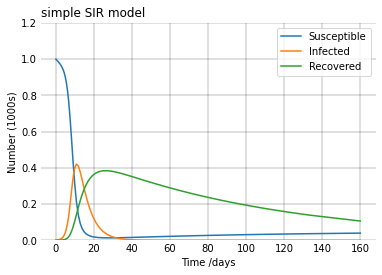

In [117]:
#plot
fig = plt.figure()
ax = fig.add_subplot(111,  axisbelow=True)
curves = ax.plot(sol.t, sol.y.T/1000)
ax.legend(curves, ['Susceptible', 'Infected', 'Recovered'])
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('simple SIR model', loc='left')
plt.show()

## SIS model modelling antibiotic resistance

In order to model the trade-offs of transmissability and virulence, we first have to develop a model of antibiotic resistance. We do this with a SIS model. The reasoning behind choosing an SIS model is that we neglect immunity and births, since we believe that in the long term these two forces will cancel out so we make the simplifying assumption that we don't explicitly model it. We model one class of susceptibles and two classes of infected individuals, one being resistant and one being sensitive. The sensitive class can be treated with antibiotic, which we encode with a $\tau$ parameter.

The ODE system that describes this model is the following:

$$
\begin{aligned}
\frac{dS}{dt} &= (\gamma_S + \tau) I_S - \beta_S S I_S + \gamma_R I_R - \beta_R SI_R\\
\frac{dI_S}{dt} &= \beta_S S I_S - (\gamma_S + \tau) I_S\\
\frac{dI_R}{dt} &= \beta_R S I_R - \gamma_R I_R
\end{aligned}
$$

Since we assume that antibiotic resistance confers an advantage in clearing but a disadvantage in infecting (need to invest cost in resistance), $\beta_S > \beta_R$. This will be encoded via a cost term $c_{\beta}$ so we end up with $\beta_R = \frac{\beta}{c_R}$ and $\beta_S = \beta$. The same applies for the clearance rate, where $\gamma_R > \gamma_S$. This we model again with a clearance cost $c_{\gamma}$ and get $\gamma_R = c_{\gamma}\gamma$ and $\gamma_S = \gamma$

$$
\begin{aligned}
\frac{dS}{dt} &= (\gamma + \tau) I_S - \beta S I_S + c_{\gamma}\gamma I_R - \frac{\beta}{c_{\beta}}SI_R\\
\frac{dI_S}{dt} &= \beta S I_S - (\gamma + \tau) I_S\\
\frac{dI_R}{dt} &= \frac{\beta}{c_{\beta}}S I_R - c_{\gamma}\gamma I_R
\end{aligned}
$$

For this case we can calculate the equilibrium solutions so where the time derivative equals zero


$$
\begin{aligned}
\frac{dS}{dt} &=  (\gamma + \tau) I_S - \beta S I_S + c_{\gamma}\gamma I_R - \frac{\beta}{c_{\beta}}SI_R \stackrel{!}{=} 0\\
\frac{dI_S}{dt} &= \beta S I_S - (\gamma + \tau) I_S \stackrel{!}{=} 0\\
\frac{dI_R}{dt} &= \frac{\beta}{c_{\beta}}S I_R - c_{\gamma}\gamma I_R \stackrel{!}{=} 0
\end{aligned}
$$


This gives the endemic solution:

$$
\begin{aligned}
S_e &= \frac{\gamma + \tau}{\beta} = \frac{c_{\gamma}c_{\beta}\gamma}{\beta}\\
I_{S_e} &= \frac{\beta(N-I_R)}{\gamma+\tau}\\
I_{R_e} &= \frac{N-\frac{\gamma c_{\gamma}c_{\beta}}{\beta}+\frac{\beta N}{\gamma + \tau}}{1 + \frac{\beta}{\gamma + \tau}}
\end{aligned}
$$

If we take the inverse of $S$ it follows that $\frac{\beta}{\gamma + \tau} = \frac{\beta}{c_{\gamma}c_{\beta}\gamma}$. This is the definition of $R_0$ meaning that we get the relationship $R_{0_S} = R_{0_R}$ at equilibrium


In [118]:
#adding birth and death rates to the simple SIR model

#available population to infect

N = 1000

#prior infected susceptible and resistant
Is0, Ir0 = 1, 1

#prior susceptible
S0 = N - Is0 - Ir0

#parameters
beta = 3/N

#clearance rate
gamma = 0.1

#terms to be added because of resistance modelling
cg = 1.075
cb = 1.1
tau = 0.075

In [119]:
#PRE: all variables are positive integers
#POST: The SIS model on antibiotic resistance

def SIS (t, y, N, beta, gamma, cg, cb, tau):
    S, Is, Ir = y
    dSdt = (gamma + tau) * Is - beta * S * Is + cg * gamma * Ir - beta/cb * S * Ir
    dIsdt = beta * S * Is - (gamma + tau) * Is
    dIrdt = beta / cb * S * Ir - cg * gamma * Ir

    return dSdt, dIsdt, dIrdt

### Solving the ODE system

In [120]:
#numerically integrate the ODEs
y0 = S0, Is0, Ir0
sol = solve_ivp(SIS, [0,t], y0, method = 'RK23', dense_output = True, args=(N, beta, gamma, cg, cb, tau))

### Plotting the results


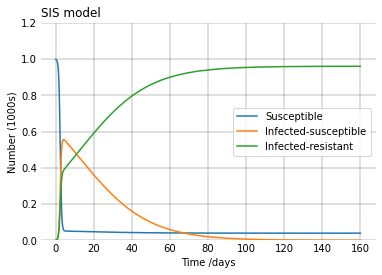

In [121]:
#plot
fig = plt.figure()
ax = fig.add_subplot(111,  axisbelow=True)
curves = ax.plot(sol.t, sol.y.T/1000)
ax.legend(curves, ['Susceptible', 'Infected-susceptible', 'Infected-resistant'])
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('SIS model', loc='left')
plt.show()

### Interactive plotting tool

In [122]:
#numerically integrate the ODEs
y0 = S0, Is0, Ir0
def interactive_plot(y0, t, N, beta, gamma, cg, cb, tau):
    sol = solve_ivp(SIS, [0,t], y0, method = 'RK23', dense_output = True, args=(N, beta, gamma, cg, cb, tau))
    fig = plt.figure()
    ax = fig.add_subplot(111,  axisbelow=True)
    curves = ax.plot(sol.t, sol.y.T/1000)
    ax.legend(curves, ['Susceptible', 'Infected-susceptible', 'Infected-resistant'])
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.title('SIS model', loc='left')
    plt.show()

In [123]:
interact(interactive_plot, y0 = fixed(y0) , t = fixed(t), N = fixed(N) , beta = widgets.FloatSlider(min=1/N, max=4/N, step=0.11/N, value=1/N), gamma = widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.1), cg = (cg), cb = (cb) , tau = widgets.FloatSlider(min=0.05, max=1, step=0.05, value=0.1))

interactive(children=(FloatSlider(value=0.001, description='beta', max=0.004, min=0.001, step=0.00011), FloatS…

<function __main__.interactive_plot(y0, t, N, beta, gamma, cg, cb, tau)>

### Phase plot of the system

In [124]:
#PRE: all variables are positive integers
#POST: The simplified SIS model on antibiotic resistance

def SISsimplified (y,t,N,beta,gamma,cg,cb,tau):
    Is, Ir = y
    dIsdt = beta * (N-Is-Ir) * Is - (gamma + tau) * Is
    dIrdt = beta / cb * (N-Is-Ir) * Ir - cg * gamma * Ir

    return dIsdt, dIrdt

Text(0, 0.5, 'Infected-resistant')

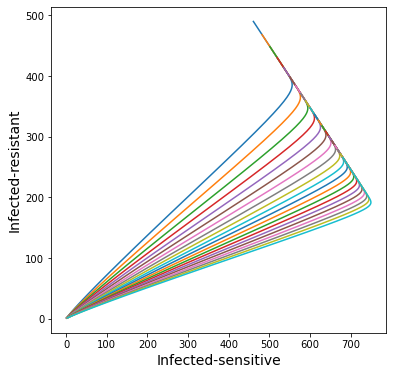

In [126]:
y0 = Is0, Ir0
#sol2 = solve_ivp(SISsimplified, [0,t], y0, method = 'RK23', dense_output = True, args=(N, beta, gamma, cg, cb, tau))
ts = np.linspace(0, 12, 100)

#print(sol.y[1])

fig = plt.figure()
fig.set_size_inches(6,6)# Square plot, 1:1 aspect ratio
ics = np.arange(1.0, 3.0, 0.1)# initial conditions
for r in ics:
    y0 = r, Ir0
    #sol2 = solve_ivp(SISsimplified, [0,t], y0, method = 'RK23', dense_output = True, args=(N, beta,     gamma, cg, cb, tau))
    sol2 = odeint (SISsimplified, y0, ts, args= (N, beta,  gamma, cg, cb, tau))
    
    plt.plot(sol2[:,0],sol2[:,1], "-")
plt.xlabel("Infected-sensitive", fontsize=14)
plt.ylabel("Infected-resistant", fontsize=14)